In [53]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from yellowbrick.cluster import SilhouetteVisualizer

In [54]:
dataset = pd.read_csv("CC GENERAL.csv")
dataset.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [56]:
dataset.drop('CUST_ID', axis=1, inplace=True)

dataset['CREDIT_LIMIT'].fillna(dataset['CREDIT_LIMIT'].mean(), inplace = True)
dataset['MINIMUM_PAYMENTS'].fillna(dataset['MINIMUM_PAYMENTS'].mean(), inplace = True)
dataset.isnull().sum().sum()

0

In [57]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels = model.fit_predict(dataset)
clust_labels = pd.DataFrame(clust_labels)
clust_labels.head()

,0
0,0
1,0
2,0
3,0
4,0


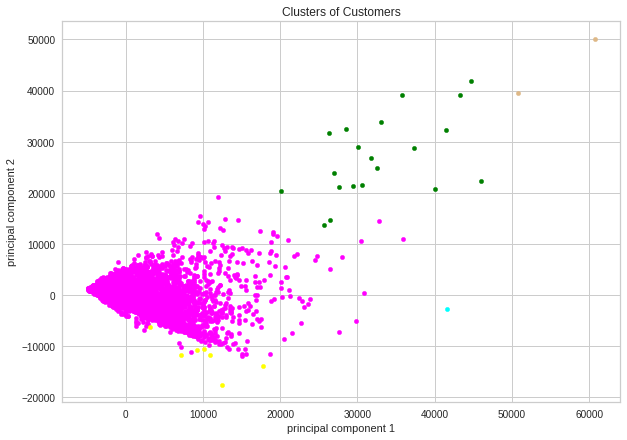

In [58]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dataset)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

plt.figure(figsize=(10,7))
plt.scatter(principalDf["principal component 1"][clust_labels[0] == 0], principalDf["principal component 2"][clust_labels[0] == 0],s=20,c='magenta')
plt.scatter(principalDf["principal component 1"][clust_labels[0] == 1], principalDf["principal component 2"][clust_labels[0] == 1],s=20,c='yellow')
plt.scatter(principalDf["principal component 1"][clust_labels[0] == 2], principalDf["principal component 2"][clust_labels[0] == 2],s=20,c='green')
plt.scatter(principalDf["principal component 1"][clust_labels[0] == 3], principalDf["principal component 2"][clust_labels[0] == 3],s=20,c='cyan')
plt.scatter(principalDf["principal component 1"][clust_labels[0] == 4], principalDf["principal component 2"][clust_labels[0] == 4],s=20,c='burlywood')
plt.title('Clusters of Customers')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()

Text(0.5, 1.0, 'Dendrogram')

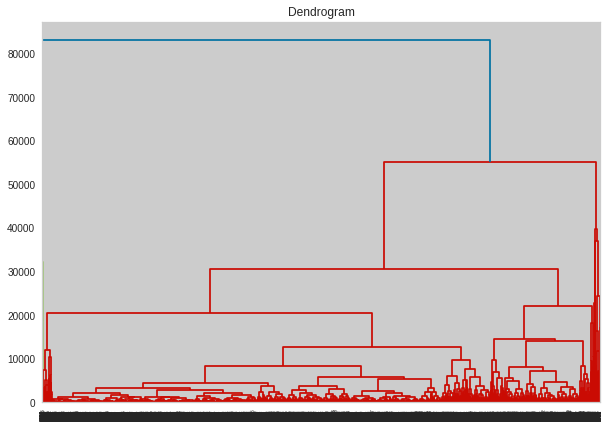

In [62]:
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(principalDf, method='complete'))
plt.title("Dendrogram")

In [59]:
model2 = KMeans(n_clusters=7, random_state=3)
model2.fit(dataset)
clust_labels2 = pd.DataFrame(model2.labels_)

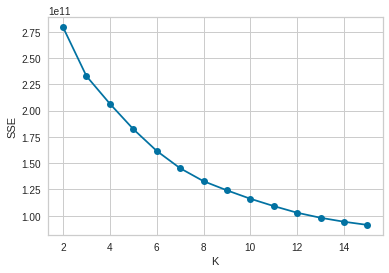

In [60]:
SSEs = []
for k in range(2, 16):
  model_try = KMeans(n_clusters=k, random_state=0)
  model_try.fit(dataset)
  SSEs.append(model_try.inertia_)

plt.plot(range(2, 16), SSEs, 'bo-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()

We can see that the elbow is at 7. So, the best k value for our model is 7.

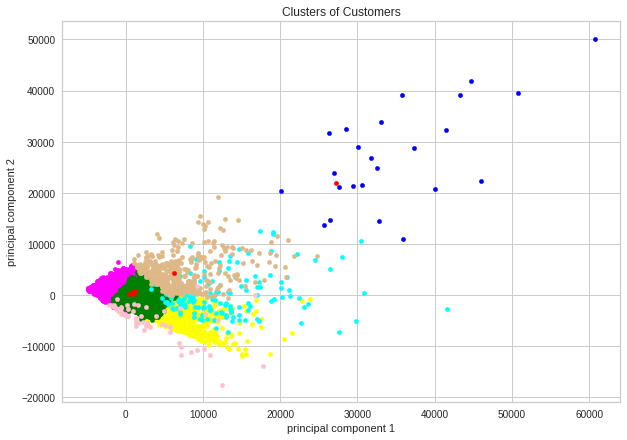

In [61]:
plt.figure(figsize=(10,7))
plt.scatter(principalDf["principal component 1"][clust_labels2[0] == 0], principalDf["principal component 2"][clust_labels2[0] == 0],s=20,c='magenta')
plt.scatter(principalDf["principal component 1"][clust_labels2[0] == 1], principalDf["principal component 2"][clust_labels2[0] == 1],s=20,c='yellow')
plt.scatter(principalDf["principal component 1"][clust_labels2[0] == 2], principalDf["principal component 2"][clust_labels2[0] == 2],s=20,c='green')
plt.scatter(principalDf["principal component 1"][clust_labels2[0] == 3], principalDf["principal component 2"][clust_labels2[0] == 3],s=20,c='cyan')
plt.scatter(principalDf["principal component 1"][clust_labels2[0] == 4], principalDf["principal component 2"][clust_labels2[0] == 4],s=20,c='burlywood')
plt.scatter(principalDf["principal component 1"][clust_labels2[0] == 5], principalDf["principal component 2"][clust_labels2[0] == 5],s=20,c='pink')
plt.scatter(principalDf["principal component 1"][clust_labels2[0] == 6], principalDf["principal component 2"][clust_labels2[0] == 6],s=20,c='blue')
plt.scatter(model2.cluster_centers_[:, 2], model2.cluster_centers_[:, 3], s=20, c='red')
plt.title('Clusters of Customers')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()

Analyzing the two plots, we can conclude that k-means is better than the hierarchical method for clustering our data, since it divides the customers to more different clusters (The customer segmentation using k-means allows us to define a better marketing strategy than using the hierarchical clustering).